In [ ]:
from random import randint
from math import sqrt
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

#### Create normally distributed sample with parameters $\mu = 2, \sigma = 7$





In [ ]:
W = st.norm(2,7)
X = W.rvs(size=20000)

In [ ]:
X

array([  2.57507309,  -8.31634145,   6.35990358, ...,   8.0748093 ,
       -12.71109677,   7.54867633])

#### Let $m$ be a randomly selected natural number from $[1, n]$. Then suppose that: $Am=\dfrac{1}{n+\sqrt{n}}\sum ^{n}_{i=1}X_{i}-\dfrac{1}{1+\sqrt{n}}X_{m}$

In [ ]:
n = len(X) 
m = randint(0,n-1) 
Xm = X[m]
Am = np.sum(X) / (n + sqrt(n)) - Xm/(1+sqrt(n))

In [ ]:
Am

1.9208903225894802

#### Let $Y_j$ be a new random variable with the following distribution: $Y_{j}=\begin{cases}X_{j}-Am,j=1,..,m-1;\\ X_{j+1}-Am,j=m,..,n-1\end{cases}$

In [ ]:
Yj = [X[j] - Am if j < m - 1 else X[j+1] - Am for j in range(n-1)]

In [ ]:
np.array(Yj)

array([  0.65418277, -10.23723178,   4.43901326, ...,   6.15391898,
       -14.63198709,   5.62778601])

#### Moving from random variable $X$ to $Yj$ allows us to eliminate parameter $\mu$. The next step will be checking if $Yj$ in fact follows normal distribution with parameters $\mu = 0, \sigma = 7$. This will be done in two ways:
* Overlaying $PDF$ of $N(0,7)$ over the histogram with $Y_j$ distribution
* Using Shapiro-Wilk test for normality

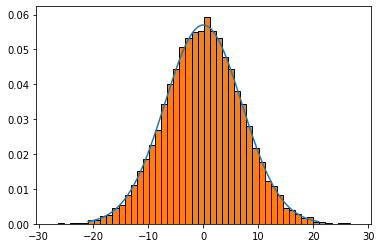

In [ ]:
# Overlaying PDF of N(0,7) over the histogram of Y_j distribution

W1 = st.norm(0,7)
z = np.linspace(-21,21,1000)
y = W1.pdf(z)
plt.plot(z,y)
plt.hist(Yj, bins=50, density=True, edgecolor='black')
plt.show()

In [ ]:
# Shapiro-Wilk test

st.shapiro(Yj)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9999418258666992, 0.9624379277229309)

#### Elimination of parameter $σ$ will then be done by creating a new variable: 
$Z_{k}=Y_{k} / \sqrt{B_{k}}$, where $B_{k}=\frac{1}{n-k-1} \sum_{j=k+1}^{n-1} Y_{j}^{2}, k=1, \ldots, n-2 .$




In [ ]:
Bk = [1 / (n - k - 1) * sum(list(map(lambda x: x**2, Yj[k:n-2]))) for k in range(n-2)]
Zk = [Yj[k] / sqrt(Bk[k]) for k in range(n-2)]

In [ ]:
np.array(Zk)

array([ 0.09394802, -1.47014545,  0.63749506, ...,  0.46613058,
        0.67149322, -1.41421356])

#### Let $F_k$ be a $CDF$ of $F_{n-k-1}(Z_k)$, which follows Student distribution $t_{n-k-1}$. If null hypothesis is correct, then $F_k$ should be independent and uniformly distributed on segment $[0,1]$. We will check it in two ways:
* Overlaying $PDF$ of $U([0,1])$ over the histogram with $F_k$ distribution
* Using Kolmogorov-Smirnov and chi-square tests

In [ ]:
Fk = np.array([st.t.cdf(x=Zk[k],df=n-(k+1)-1) for k in range(len(Zk))])

In [ ]:
Fk

array([0.53742431, 0.07076905, 0.73809514, ..., 0.66355961, 0.71446112,
       0.19591328])

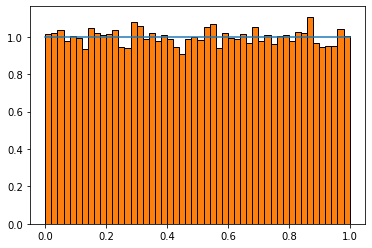

In [ ]:
# Overlaying PDF of U([0,1]) over the histogram of F_k distribution

W2 = st.uniform()
z = np.linspace(0,1,1000)
y = W2.pdf(z)
plt.plot(z,y)
plt.hist(Fk, bins=50, density=True, edgecolor='black')
plt.show()

In [ ]:
# Kolmogorov-Smirnov test for uniform distribution

st.kstest(Fk, 'uniform', args=(0, 1))

KstestResult(statistic=0.003549961678092295, pvalue=0.9626416156745609)

In [ ]:
# Chi-square test for uniform distribution

st.chisquare(Fk)

Power_divergenceResult(statistic=3342.4016839312735, pvalue=1.0)

#### All above-mentioned steps make up ${Parameter\space Elimination\space Method\space (PEM)}$ test for normality:

In [ ]:
def pem_test(X: list):
  """
    pem_test(X) carries out a test for normality based on Parameter Elimination Method

    :param: X - sample for testing the method on

    :returns: dictionary with test statistic ('stat') and p-value ('pvalue')
  """
  n = len(X) 
  m = randint(0,n-1) 
  Xm = X[m]
  Am = np.sum(X) / (n + sqrt(n)) - Xm/(1+sqrt(n))
  Yj = [X[j] - Am if j < m - 1 else X[j+1] - Am for j in range(n-1)]
  Bk = [1 / (n - k - 1) * sum(list(map(lambda x: x**2, Yj[k:n-2]))) for k in range(n-2)]
  Zk = [Yj[k] / sqrt(Bk[k]) for k in range(n-2)]
  Fk = np.array([st.t.cdf(x=Zk[k],df=n-(k+1)-1) for k in range(len(Zk))])
  ks_test = st.kstest(Fk, 'uniform', args=(0, 1))
  return {'stat': ks_test[0], 'pvalue': ks_test[1]}

#### Performing $PEM$ test on normally distributed $X$ sample

In [ ]:
pem_test(X)

{'pvalue': 0.33730529232864115, 'stat': 0.0066618550455152525}